# Supervised Machine Learning: Classification of housing prices

In [2]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ab394f9bd5effdaafdbaba53c95a598879c1f1a3c262c0a27020c8ae094ab29b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')


In [4]:
pd.set_option('display.max_columns', 100)

# 1. Classifying housing data

In [6]:
# Importing the data
path = '/content/Competition_Labeled_Data.csv'

data_raw = pd.read_csv(path)

In [ ]:

data_raw

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN,60,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,1,8,2003.0,548,61,0,0,0,2,2008,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA,20,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,1,6,1976.0,460,0,0,0,0,5,2007,2,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA,60,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,1,6,2001.0,608,42,0,0,0,9,2008,3,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd,70,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,1,7,1998.0,642,35,272,0,0,2,2006,4,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA,60,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,1,9,2000.0,836,84,0,0,0,12,2008,5,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc,TA,TA,Gd,TA,No,Unf,TA,TA,60,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,1,7,1999.0,460,40,0,0,0,8,2007,1456,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,No,ALQ,TA,TA,20,6,6,1978,1988,119.0,790,163,589,2073,0,0,2073,1,0,2,0,1,7,1978.0,500,0,0,0,0,2,2010,1457,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,Rec,TA,SBrkr,Min1,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,RL,Norm,GasA,Pave,Y,Stone,Ex,Gd,TA,Gd,No,GLQ,Gd,Gd,70,7,9,1941,2006,0.0,275,0,877,1188,1152,0,2340,0,0,2,0,1,9,1941.0,252,60,0,0,2500,5,2010,1458,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,Mn,GLQ,Gd,NaN,20,5,6,1950,1996,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,1,5,1950.0,240,0,112,0,0,4,2010,1459,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1Story,

In [7]:
data = data_raw.copy().set_index('Id')

In [8]:
data = data.drop(['PoolQC','MiscFeature','Fence', 'Alley'], axis=1)

## 1.1 Feature selection

In [9]:
# Categorical features

cat_cols = ['BsmtQual', 'BsmtCond','ExterQual','ExterCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']

for col in cat_cols:
    data[col]=data[col].astype('category')

In [10]:
num_all_df = data_raw.select_dtypes('number').drop(['Expensive','Id'], axis=1)
#num_all_df.columns
num_all = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold']

In [11]:
num_cols = (
    data.select_dtypes(include='number')  # keep only numeric columns
    .corrwith(data['Expensive'])          # compute correlation with 'Expensive'
    .abs()                                # take absolute value of correlations
    .sort_values(ascending=False)         # sort by strength
    .drop(['Expensive'])                  # drop the target column itself
    .head(15)                             # take top 15
    .index.to_list()                      # get column names as list
)


In [12]:
# Object features

obj_cols = ['MSZoning', 'Condition1', 'Heating',
            #'Street',
            'CentralAir',
       'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'LotShape', 'LandContour',
            #'Utilities',
            'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition']


In [13]:
# Columns selected for analysis

select_cols = []
select_cols = num_cols + cat_cols + obj_cols

## 1.2 Building the pipeline

In [14]:
X = data[select_cols]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OverallQual    1460 non-null   int64   
 1   GrLivArea      1460 non-null   int64   
 2   GarageArea     1460 non-null   int64   
 3   1stFlrSF       1460 non-null   int64   
 4   TotalBsmtSF    1460 non-null   int64   
 5   GarageCars     1460 non-null   int64   
 6   TotRmsAbvGrd   1460 non-null   int64   
 7   MasVnrArea     1452 non-null   float64 
 8   FullBath       1460 non-null   int64   
 9   Fireplaces     1460 non-null   int64   
 10  YearRemodAdd   1460 non-null   int64   
 11  YearBuilt      1460 non-null   int64   
 12  GarageYrBlt    1379 non-null   float64 
 13  BsmtFinSF1     1460 non-null   int64   
 14  LotFrontage    1201 non-null   float64 
 15  BsmtQual       1423 non-null   category
 16  BsmtCond       1423 non-null   category
 17  ExterQual      1460 non-null   categor

In [15]:
X.describe().loc[["min", "max"]].T

,min,max
OverallQual,1.0,10.0
GrLivArea,334.0,5642.0
GarageArea,0.0,1418.0
1stFlrSF,334.0,4692.0
TotalBsmtSF,0.0,6110.0
GarageCars,0.0,4.0
TotRmsAbvGrd,2.0,14.0
MasVnrArea,0.0,1600.0
FullBath,0.0,3.0
Fireplaces,0.0,3.0


In [16]:
y = data.Expensive

In [17]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23583)

### 1.2.1 Preparing the mini pipes (numerical, categorical, object)

In [18]:
# Numeric pipe

#num_cols_select = ['TotalBsmtSF','Fireplaces','GarageCars','OverallQual','MasVnrArea','1stFlrSF','GrLivArea','GarageArea', 'ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual']

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))

In [19]:
#  categoric pipeline for ordinal features

quality = ['NA','Po','Fa','TA','Gd','Ex'] #for cat_cols

categoric_ordinal_pipe = make_pipeline(
    (SimpleImputer(strategy="constant", fill_value="NA")),
    (OrdinalEncoder(categories=[quality]*len(cat_cols), handle_unknown='use_encoded_value', unknown_value=-1))
    )


In [20]:
# Categoric pipe for non-ordinal features

categoric_onehot_pipe = make_pipeline(
            (SimpleImputer(strategy="constant", fill_value="NA")),
            (OneHotEncoder(handle_unknown='ignore', sparse_output=False))
)

### 1.2.2 Preparing the preprocessor and full pipeline

In [24]:
# Defining the preprocessor
from sklearn.compose import make_column_transformer, make_column_selector
preprocessor = make_column_transformer(
        (numeric_pipe,make_column_selector(dtype_include='number')),
        (categoric_ordinal_pipe, make_column_selector(dtype_include='category')),
       (categoric_onehot_pipe, make_column_selector(dtype_include='object'))
)

In [27]:

#SelectFromModel(estimator, max_featuers=15)
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif, k=10)  # You can change k as needed


In [29]:
# Defining the full pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

full_pipeline = make_pipeline(preprocessor, feature_selection,
                              DecisionTreeClassifier()).set_output(transform='pandas')

# Fitting the data
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7970767bc990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder'...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797075d53a10>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797075d50850>)])),
                ('selectkbest', SelectKBest()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### 1.2.3 Model selection

#### Decision Tree Classifier

In [30]:
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)
parameters = {"dtree": dt_search.best_params_}
scores = {"dtree" : dt_search.best_score_}

scores, parameters

Fitting 5 folds for each of 60 candidates, totalling 300 fits


({'dtree': np.float64(0.9452221121749018)},
 {'dtree': {'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
   'decisiontreeclassifier__max_depth': 4,
   'decisiontreeclassifier__min_samples_leaf': 5}})

In [31]:
# Fitting data with best parameters

dt_best = dt_search.best_estimator_.fit(X_train,y_train)

# train and test accuracy
accuracy_score(y_train, dt_best.predict(X_train)), accuracy_score(y_test, dt_best.predict(X_test))

(0.958904109589041, 0.910958904109589)

#### KNearest Neighbour

In [32]:
knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsClassifier()
                                 )

param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)
knn_search.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__n_neighbors': 27,
 'kneighborsclassifier__weights': 'distance'}

In [33]:
# Fitting data with best parameters
knn_best = knn_search.best_estimator_.fit(X_train, y_train)

# train and test accuracy
accuracy_score(y_train, knn_best.predict(X_train)), accuracy_score(y_test, knn_best.predict(X_test))

(1.0, 0.8938356164383562)

## 1.3 Error Analysis

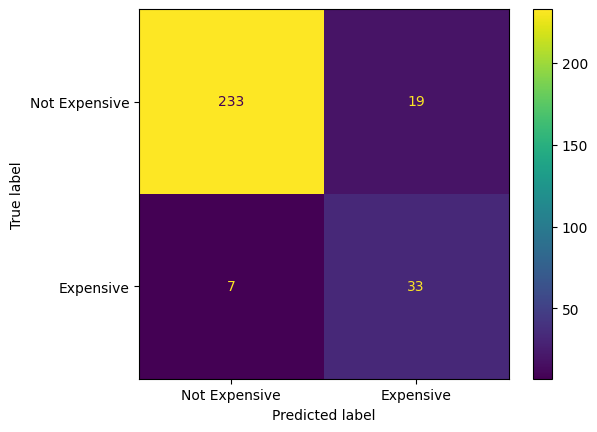

In [34]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_best,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

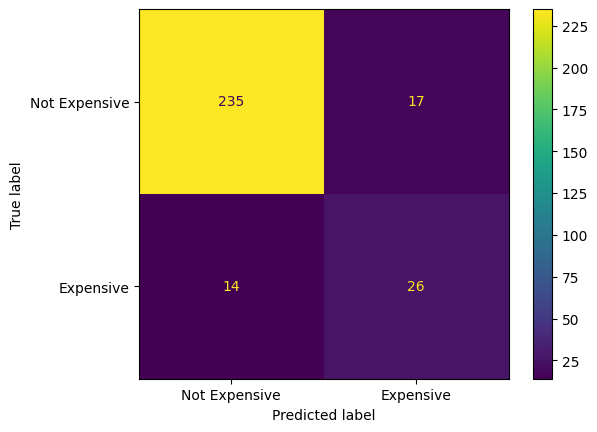

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_best,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

## 1.4 Loading new test data for prediction

In [36]:

data_new = pd.read_csv('/content/Competition_Labeled_Data.csv')


In [37]:
id_column = data_new.pop('Id')

In [38]:
data_new = data_new[select_cols]

In [39]:
accuracy_score(y_true=y_test,
               y_pred=knn_search.predict(X_test))

0.8938356164383562

In [40]:
# Now that we are done tuning and testing, right before deployment we can train with all our labeled data
knn_search.best_estimator_.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797073208910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(c...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79707312b950>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7970732b7e90>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=27, weights='distance'))])

In [41]:
# Bring in unlabeled data
X_competition = pd.read_csv('..//content/Unlabeled_Competition_Data.csv')

# Hide Id column from model (we should have done this with the labeled dataset as well)
X_comp = X_competition.set_index('Id')

In [44]:
# Make predictions with the unlabeled competition data
preds = knn_search.predict(X_comp)

# Format those predictions for the competition
submission = pd.DataFrame(
    {'Expensive':preds},
    index=X_comp.index
)

# Export the predictions as a csv to be uploaded to the competition
submission.to_csv('../content/competition_submission.csv')